# Sheet 3: Classification using SVMs

## Question 1 : Data preparation

### a) Load the olivetti faces dataset from sklearn. Set shuffle to be true. The dataset has 40 distinct classes with faces taken under different lighting, expressions, and facial details. The images are of size 64 * 64. <br> b) Use the data and target attributes to obtain the data and target vectors. Split the dataset such that the first 300 items belong to the train set and the last 100 belong to the test set. Here, we do not need to shuffle the data as it is already done while the dataset is being loaded. 

In [3]:
import sklearn
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().data
target = fetch_olivetti_faces().target

/home/vishnu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/vishnu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/vishnu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

## Question 2: PCA

### a) Perform PCA using sklearn on the train set by varying the n_components among 20,40,70,100,140. Plot the number of components vs the amount of variance captured. <br> b) How do you think the performance of SVM will vary as the number of components is varied? (Comment in terms of overfitting on train set, generalization, accuracy on test set). 

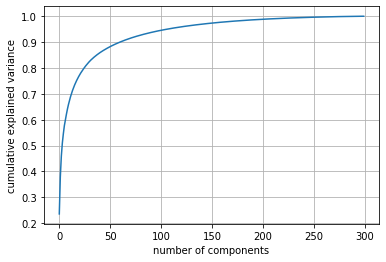

In [13]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [55]:
pca_20 = PCA(n_components=20)
y_20 = pca_20.fit_transform(X_train)
pca_40 = PCA(n_components=40)
y_40 = pca_40.fit_transform(X_train)
pca_70 = PCA(n_components=70)
y_70 = pca_70.fit(X_train)
pca_100 = PCA(n_components=100)
y_100 = pca_100.fit_transform(X_train)
pca_140 = PCA(n_components=140)
y_140 = pca_140.fit_transform(X_train)



SVM performs poor as we decrase the components as we are not might not be taking all the dimensions into consideration

## Question 3: SVM

### a) Perform PCA on the train dataset using n_components = 70. <br> b) Perform SVM with C = 1, and kernel = 'rbf'. Report the score on the test set (after transformation using PCA) using SVC's inbuilt score function. <br> c) Report the confusion matrix using the predictions on the test set. 

In [56]:
projecte_70 = pca_70.transform(X_train)

In [57]:
test_70 = pca_70.transform(X_test)

In [58]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel='rbf', C=1)
clf_rbf.fit(projecte_70, y_train)
y_SVM = clf_rbf.predict(test_70)

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
clf_rbf.score(test_70, y_test)

0.93

In [35]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,y_SVM)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3]])

## Question 4: Cross validation

### Now take the entire original dataset that you initially downloaded (before you performed train test split, and before PCA - We will use all features and the entire dataset for this question). We will determine the parameters using cross validation. You will use the GridSearchCV in sklearn to perform cross validation. <br> a) To construct the parameter grid, use the rbf kernel. gamma should take values in {0.0001, 0.001, 0.01, 0.1, 1, 10} and C should take values in {0.001,0.01,0.1,1,10,100}. Set the number of folds for cross validation to 5. Report the best_parameters_, best_score_, best_estimator_. <br> b) Print out the attribute cv_results_. From cv_results_, what are the trends (based on accuracy score) as C and gamma increase? Also, state the reason for these trends (overfitting, underfitting, generalization). 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid = [{'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.001,0.01,0.1,1,10,100], 'kernel': ['rbf']}]
clf = GridSearchCV(estimator=SVC(), cv = 5, param_grid=grid, n_jobs=-1)
clf.fit(data, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [44]:
clf.best_score_

0.9675

In [45]:
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
import pandas as pd
rank = clf.cv_results_['rank_test_score']
parameters = clf.cv_results_['params']
acc = clf.cv_results_['mean_test_score']
result = pd.DataFrame({'Rank':rank,'Model Params':parameters,'Score':acc})
result = result.sort_values(by='Rank',axis=0)

In [48]:
result

,Rank,Model Params,Score
30,1,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9675
24,2,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.9625
25,3,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.9550
31,3,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9550
19,5,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.9475
4,6,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.9075
16,6,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.9075
10,6,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}",0.9075
1,9,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.8750
7,9,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.8750


Both C and gamma can't be high or low. To obtain max score we need to have high C and low gamma. And as we see trend it appears that as C decreases gamma incrases to keep up the score. The reason maybe that for high C and high gamma there is a possibilty of overfitting and low C and low gamma can be of underfitting